# Required Libraries

Since I am using a venv, I need to import all required packages. A full list of packages needded is summarized below.

In [303]:
"""%pip install pandas

# scientific libraries
%pip install numpy
%pip install scikit-learn

# plotting libraries
%pip install matplotlib
%pip install seaborn
%pip install wordcloud
%pip install plotly
%pip install nbformat

# word vectorization
%pip install gensim"""

'%pip install pandas\n\n# scientific libraries\n%pip install numpy\n%pip install scikit-learn\n%pip install yellowbrick\n\n# plotting libraries\n%pip install matplotlib\n%pip install seaborn\n%pip install wordcloud\n%pip install plotly\n%pip install nbformat\n\n# word vectorization\n%pip install gensim'

In [304]:
import warnings
warnings.filterwarnings("ignore")

# *1. Data Collection*

In [305]:
import pandas as pd

In [306]:
course_df = pd.read_csv('data/course_genre.csv')
ratings_df = pd.read_csv('data/ratings.csv')

In [307]:
course_df.head()

,COURSE_ID,TITLE,DESCRIPTION,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,robots are coming build iot apps with watson ...,have fun with iot and learn along the way if ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,accelerating deep learning with gpu,training complex deep learning models with lar...,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,GPXX0ZG0EN,consuming restful services using the reactive ...,learn how to use a reactive jax rs client to a...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,RP0105EN,analyzing big data in r using apache spark,apache spark is a popular cluster computing fr...,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,learn how to containerize package and run a ...,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [308]:
ratings_df.head()

,user,item,rating
0,1889878,CC0101EN,3.0
1,1342067,CL0101EN,3.0
2,1990814,ML0120ENv3,3.0
3,380098,BD0211EN,3.0
4,779563,DS0101EN,3.0


# *2. Exploratory Data Analysis*

In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

## Course Genre

In [310]:
genres = course_df.columns[3:]
genre_sum = course_df[genres].sum().sort_values(ascending=False)

fig = px.bar(x=genre_sum.index, y=genre_sum, labels={'y': 'Count', 'x': 'Genre'}, title='Genre Counts',
             category_orders={'x': genre_sum.index})
fig.show()

## Course Enrollment

In [311]:
ratings_df.head()

,user,item,rating
0,1889878,CC0101EN,3.0
1,1342067,CL0101EN,3.0
2,1990814,ML0120ENv3,3.0
3,380098,BD0211EN,3.0
4,779563,DS0101EN,3.0


In [312]:
ratings_df['rating'].unique()

array([3., 2.])

In [313]:
ratings_count = ratings_df['user'].value_counts().value_counts()

fig = px.bar(x=ratings_count.index, y=ratings_count, labels={'y': 'Count', 'x': 'Number of Enrolls'}, title='Course Enrolment Counts',
             category_orders={'x': ratings_count.index})
fig.show()

In [314]:
# Let use logarithmic axes to make the graph readable
fig = px.bar(x=ratings_count.index, y=ratings_count, labels={'y': 'Count', 'x': 'Number of Enrolls'}, title='Course Enrolment Counts',
             category_orders={'x': ratings_count.index}, log_y=True)
fig.show()

## Popular Courses

In [315]:
ratings_df_top_courses = ratings_df.groupby(['item']).size().reset_index() # group by course_id
ratings_df_top_courses.columns = ['course_id', 'Enrolls'] # rename the columns
ratings_df_top_courses

,course_id,Enrolls
0,AI0111EN,383
1,BC0101EN,6719
2,BC0201EN,2866
3,BC0202EN,775
4,BD0101EN,13291
...,...,...
121,TMP0105EN,347
122,TMP0106,35
123,TMP107,2
124,WA0101EN,2247


In [316]:
ratings_df_top_courses = ratings_df_top_courses.sort_values(by='Enrolls', ascending=False).reset_index(drop=True)
ratings_df_top_courses.head(20)

,course_id,Enrolls
0,PY0101EN,14936
1,DS0101EN,14477
2,BD0101EN,13291
3,BD0111EN,10599
4,DA0101EN,8303
5,DS0103EN,7719
6,ML0101ENv3,7644
7,BD0211EN,7551
8,DS0105EN,7199
9,BC0101EN,6719


We now need to connect the course id to the course name from the other dataframe.

In [317]:
course_df.head(3)

,COURSE_ID,TITLE,DESCRIPTION,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,robots are coming build iot apps with watson ...,have fun with iot and learn along the way if ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,accelerating deep learning with gpu,training complex deep learning models with lar...,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,GPXX0ZG0EN,consuming restful services using the reactive ...,learn how to use a reactive jax rs client to a...,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [318]:
merged_df = pd.merge(ratings_df_top_courses,course_df[['COURSE_ID','TITLE']], left_on='course_id', right_on='COURSE_ID')
merged_df

,course_id,Enrolls,COURSE_ID,TITLE
0,PY0101EN,14936,PY0101EN,python for data science
1,DS0101EN,14477,DS0101EN,introduction to data science
2,BD0101EN,13291,BD0101EN,big data 101
3,BD0111EN,10599,BD0111EN,hadoop 101
4,DA0101EN,8303,DA0101EN,data analysis with python
...,...,...,...,...
121,ST0201EN,1,ST0201EN,statistics 201
122,ST0301EN,1,ST0301EN,statistics 301
123,DX0106EN,1,DX0106EN,data science bootcamp with r for university pr...
124,DX0108EN,1,DX0108EN,data science bootcamp with python for universi...


In [319]:
merged_df[['TITLE', 'Enrolls']].head(20)

,TITLE,Enrolls
0,python for data science,14936
1,introduction to data science,14477
2,big data 101,13291
3,hadoop 101,10599
4,data analysis with python,8303
5,data science methodology,7719
6,machine learning with python,7644
7,spark fundamentals i,7551
8,data science hands on with open source tools,7199
9,blockchain essentials,6719


## Word Cloud

Lets start by plotting the most common words that appear in the course titles. We can do this by making a Word Cloud from said titles.

In [320]:
def plot_wordcloud(wordcloud):
    plt.figure(figsize=(40,20))
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

In [321]:
titles = " ".join(title for title in course_df['TITLE'].astype(str))

We want to exclude common words such as 'and', 'a', 'to', etc. from the Word Cloud. `wordcloud.STOPWORDS` contains exacly such words. We can also extend the list with additional words that are found in the give titles.

In [322]:
stopwords = set(STOPWORDS)
stopwords.update(["getting started", "using", "enabling", "template", "university", "end", "introduction", "basic"])

Now we can create our `WordCloud` object to visualize the frequency of words in the titles.

In [323]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400)
wordcloud.generate(titles)

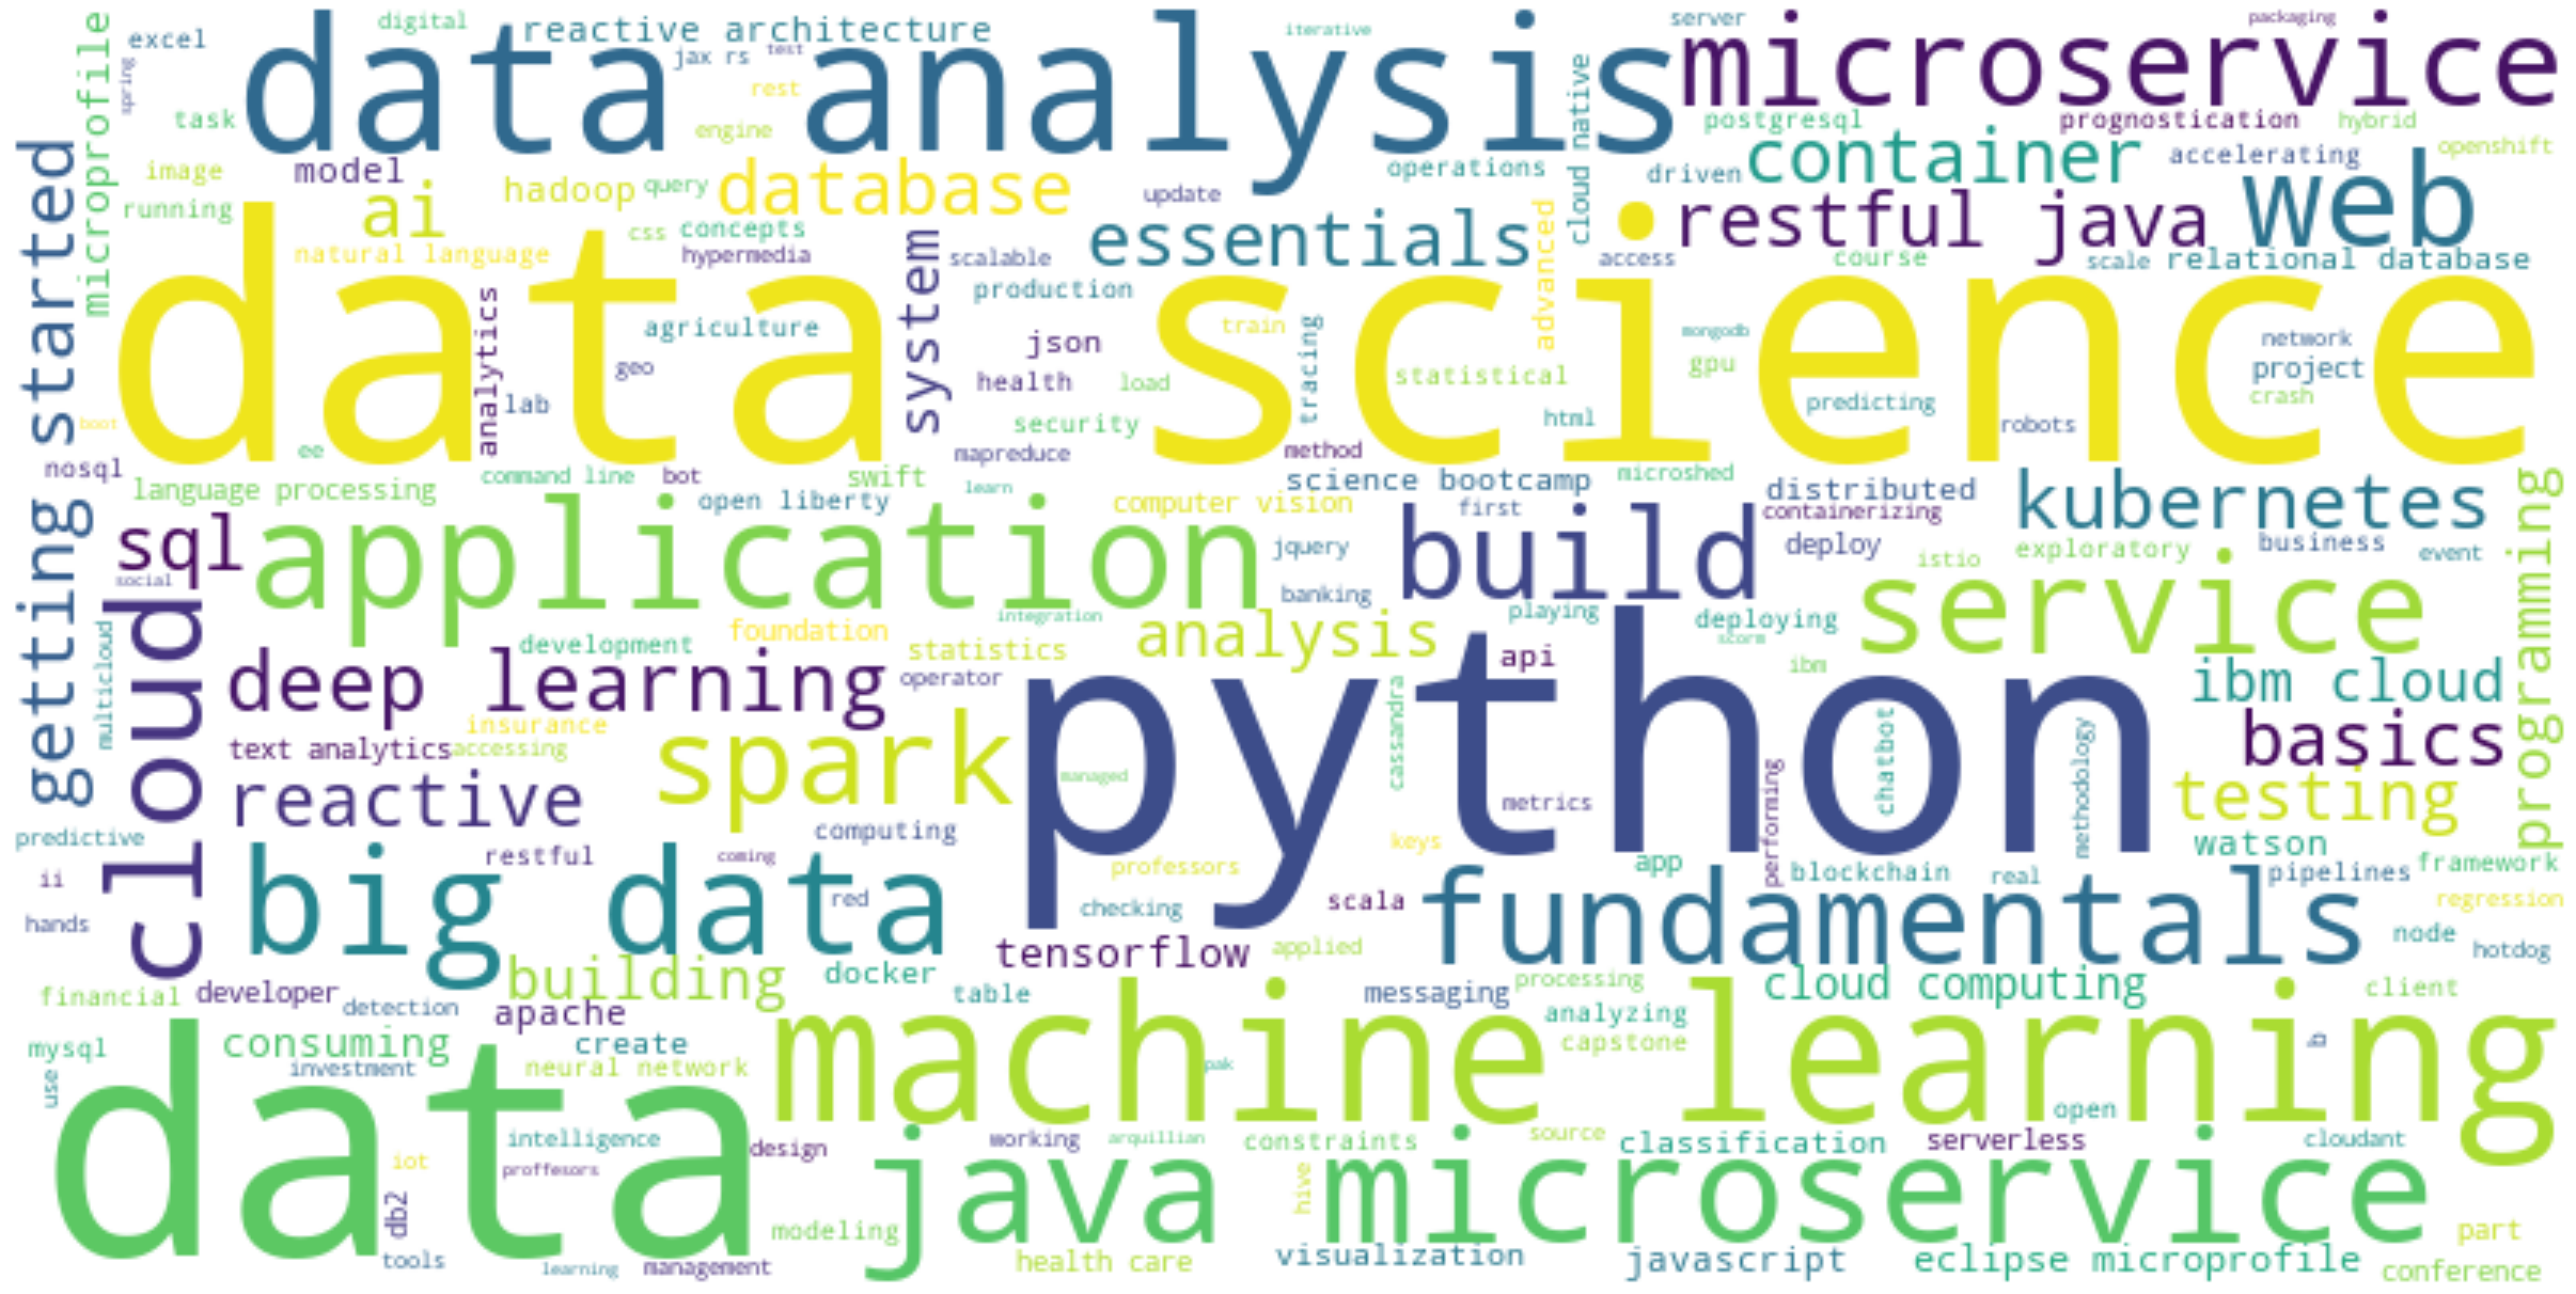

In [324]:
plot_wordcloud(wordcloud=wordcloud)

# *3. Modelling*

In [325]:
user_profile = pd.read_csv('data/user_course_interests.csv')

## Content-based Recommender system using User Profile and Course Genres

In [326]:
user_profile.head()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,2,52.0,14.0,6.0,43.0,3.0,33.0,0.0,29.0,41.0,2.0,18.0,34.0,9.0,6.0
1,4,40.0,2.0,4.0,28.0,0.0,14.0,0.0,20.0,24.0,0.0,6.0,6.0,0.0,2.0
2,5,24.0,8.0,18.0,24.0,0.0,30.0,0.0,22.0,14.0,2.0,14.0,26.0,4.0,6.0
3,7,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,8,6.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0


In [327]:
user_profile.shape

(33901, 15)

Lets take a sample of users to make course recommendations.

In [328]:
test_users = ratings_df.sample(n=1000, random_state=1)

In [329]:
test_users.head()

,user,item,rating
95965,1499703,CO0101EN,3.0
185482,1755211,DS0101EN,3.0
30316,397404,CB0103EN,3.0
118400,1048679,PY0101EN,3.0
100044,1666641,CC0103EN,3.0


Lets find the courses that are unknown to the test users.

In [330]:
# Lets take the first user of the dataframe
test_user_profile = user_profile[user_profile['user'] == 1499703]
test_user_profile

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
26225,1499703,6.0,3.0,6.0,0.0,3.0,0.0,0.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0


In [331]:
# Now let's get the test user vector by excluding the `user` column
test_user_vector = test_user_profile.iloc[0, 1:].values
test_user_vector

array([6., 3., 6., 0., 3., 0., 0., 6., 6., 0., 0., 0., 0., 0.])

In [332]:
enrolled_courses = test_users[test_users['user'] == 1499703]['item'].to_list()
enrolled_courses = set(enrolled_courses)
enrolled_courses

{'CO0101EN'}

In [333]:
# get the unknown courses
all_courses = set(course_df['COURSE_ID'].values)
unknown_courses = all_courses.difference(enrolled_courses)

In [334]:
# get the vectors from those unknown courses
unknown_course_genres = course_df[course_df['COURSE_ID'].isin(unknown_courses)]
# Now let's get the course matrix by excluding `COURSE_ID` and `TITLE` columns:
course_matrix = unknown_course_genres.iloc[:, 3:].values
course_matrix

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0]], dtype=int64)

We can now get a score for all the unknown courses based on the user's ratings. 

In [335]:
score = np.dot(course_matrix, test_user_vector)
score[:10] # show the first 5 scores

array([ 0.,  9.,  0., 12.,  3.,  6.,  6.,  3.,  0.,  6.])

Lets generalize for all 1000 test users.

In [336]:
res_dict = {}

In [337]:
def generate_recommendation_scores(test_users, user_profile, course_df):
    score_threshold=10
    users = []
    courses = []
    scores = []

    test_user_list = test_users.groupby(['user']).max().reset_index(drop=False)
    test_user_ids = test_user_list['user'].to_list()

    for user_id in test_user_ids:
        test_user_profile = user_profile[user_profile['user'] == user_id]
        # get user vector for the current user id
        test_user_vector = test_user_profile[test_user_profile['user'] == user_id].iloc[0, 1:].values
        
        # get the unknown course ids for the current user id
        enrolled_courses = test_users[test_users['user'] == user_id]['item'].to_list()
        unknown_courses = all_courses.difference(enrolled_courses)
        unknown_course_df = course_df[course_df['COURSE_ID'].isin(unknown_courses)]
        unknown_course_ids = unknown_course_df['COURSE_ID'].values
        
        # get the recommendation scores for each course
        recommendation_scores = np.dot(unknown_course_df.iloc[:, 3:].values, test_user_vector)

        # Append the results into the users, courses, and scores list
        for i in range(0, len(unknown_course_ids)):
            score = recommendation_scores[i]
            # Only keep the courses with high recommendation score
            if score >= score_threshold:
                users.append(user_id)
                courses.append(unknown_course_ids[i])
                scores.append(recommendation_scores[i])
                
    return users, courses, scores

In [338]:
# Return users, courses, and scores lists for the dataframe
users, courses, scores = generate_recommendation_scores(test_users, user_profile, course_df)
res_dict['USER'] = users
res_dict['COURSE_ID'] = courses
res_dict['SCORE'] = scores
res_df = pd.DataFrame(res_dict, columns=['USER', 'COURSE_ID', 'SCORE'])
# Save the dataframe 
res_df.to_csv("profile_rs_results.csv", index=False)
res_df

,USER,COURSE_ID,SCORE
0,4,ML0122EN,36.0
1,4,RP0105EN,98.0
2,4,DX0106EN,26.0
3,4,GPXX06RFEN,40.0
4,4,CC0271EN,44.0
...,...,...,...
87509,2098743,excourse62,21.0
87510,2098743,excourse63,12.0
87511,2098743,excourse64,12.0
87512,2098743,excourse65,21.0


### Most commonly recommended courses.

In [339]:
top_courses = res_df.groupby('COURSE_ID')['SCORE'].sum().sort_values(ascending=False)
pd.DataFrame(top_courses).head(10)

,SCORE
COURSE_ID,
RP0105EN,25232.0
excourse72,23462.0
excourse73,23462.0
TMP0105EN,23318.0
SC0103EN,23003.0
BD0212EN,22730.0
BD0211EN,22367.0
TA0106EN,20779.0
excourse31,20637.0


## Content-based Recommender System using Course Similarities

In [340]:
import gensim
import nltk as nltk
from gensim import corpora
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from scipy.spatial.distance import cosine
from tqdm import tqdm

In [341]:
course_df.head()

,COURSE_ID,TITLE,DESCRIPTION,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,robots are coming build iot apps with watson ...,have fun with iot and learn along the way if ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,accelerating deep learning with gpu,training complex deep learning models with lar...,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,GPXX0ZG0EN,consuming restful services using the reactive ...,learn how to use a reactive jax rs client to a...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,RP0105EN,analyzing big data in r using apache spark,apache spark is a popular cluster computing fr...,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,learn how to containerize package and run a ...,0,0,0,0,1,0,0,0,0,0,0,1,0,0


### Tokenize title and description

In [342]:
# Merge TITLE and DESCRIPTION title
course_content_df = pd.DataFrame()
course_content_df['COURSE_ID'] = course_df['COURSE_ID']
course_content_df['course_texts'] = course_df[['TITLE', 'DESCRIPTION']].agg(' '.join, axis=1)
course_content_df

,COURSE_ID,course_texts
0,ML0201EN,robots are coming build iot apps with watson ...
1,ML0122EN,accelerating deep learning with gpu training c...
2,GPXX0ZG0EN,consuming restful services using the reactive ...
3,RP0105EN,analyzing big data in r using apache spark apa...
4,GPXX0Z2PEN,containerizing packaging and running a sprin...
...,...,...
302,excourse89,javascript jquery and json in this course w...
303,excourse90,programming foundations with javascript html ...
304,excourse91,front end web development with react this cour...
305,excourse92,introduction to web development this course is...


In [343]:
def tokenize_course(course, keep_only_nouns=True):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(course)
    # Remove English stop words and numbers
    word_tokens = [w for w in word_tokens if (not w.lower() in stop_words) and (not w.isnumeric())]
    # Only keep nouns 
    if keep_only_nouns:
        filter_list = ['WDT', 'WP', 'WRB', 'FW', 'IN', 'JJR', 'JJS', 'MD', 'PDT', 'POS', 'PRP', 'RB', 'RBR', 'RBS',
                       'RP']
        tags = nltk.pos_tag(word_tokens)
        word_tokens = [word for word, pos in tags if pos not in filter_list]

    return word_tokens

In [344]:
# tokenize all courses of course_content_df
tokenized_courses = [tokenize_course(course_text) for course_text in course_content_df['course_texts']]
# make a dictionary of the tokenized courses
tokens_dict = gensim.corpora.Dictionary(tokenized_courses)
# generate the BoW features for each tokenized course
courses_bow = [tokens_dict.doc2bow(course) for course in tokenized_courses]
courses_bow

[[(0, 2),
  (1, 2),
  (2, 2),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 4),
  (11, 1),
  (12, 2),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 2),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 2),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 2),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 2),
  (33, 1)],
 [(0, 2),
  (3, 2),
  (6, 1),
  (12, 1),
  (30, 4),
  (34, 1),
  (35, 5),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 2),
  (49, 1),
  (50, 4),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 7),
  (57, 5),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 2),
  (62, 1),
  (63, 1),
  (64, 6),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 3),
  (72, 2),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 3),
  (79, 1),
  (80, 1),
  (81, 2),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),


### Extract the BoW features

In [345]:
doc_index = []
doc_id = []
bags_of_token = []
bow = []

for idx, bag in enumerate(courses_bow):
    for word in bag:
        token = tokens_dict[word[0]]
        doc_index.append(idx)
        doc_id.append(course_content_df['COURSE_ID'][idx])
        bags_of_token.append(token)
        bow.append(word[1])

bow_dicts = {"doc_index": doc_index,
           "doc_id": doc_id,
            "token": bags_of_token,
            "bow": bow}

bow_df = pd.DataFrame(bow_dicts)
bow_df

,doc_index,doc_id,token,bow
0,0,ML0201EN,ai,2
1,0,ML0201EN,apps,2
2,0,ML0201EN,build,2
3,0,ML0201EN,cloud,1
4,0,ML0201EN,coming,1
...,...,...,...,...
10343,306,excourse93,modifying,1
10344,306,excourse93,objectives,1
10345,306,excourse93,pieces,1
10346,306,excourse93,plugins,1


In [346]:
def pivot_two_bows(basedoc, comparedoc):
    base = basedoc.copy()
    base['type'] = 'base'
    compare = comparedoc.copy()
    compare['type'] = 'compare'
    # Append the two token sets vertically
    join = pd.concat([base, compare])
    # Pivot the two joined courses
    joinT = join.pivot(index=['doc_id', 'type'], columns='token').fillna(0).reset_index(level=[0, 1])
    # Assign columns
    joinT.columns = ['doc_id', 'type'] + [t[1] for t in joinT.columns][2:]
    return joinT

### Construct simmilarity matrix

In [347]:
def get_simmilarity(column_1, column_2):
    course1 = bow_df[bow_df['doc_id'] == column_1].iloc[:,1:]
    course2 = bow_df[bow_df['doc_id'] == column_2].iloc[:,1:]
    bow_vectors = pivot_two_bows(course1, course2)
    similarity = 1 - cosine(bow_vectors.iloc[0, 2:], bow_vectors.iloc[1, 2:])
    return similarity

In [348]:
course_list = bow_df['doc_id'].unique()
course_list

array(['ML0201EN', 'ML0122EN', 'GPXX0ZG0EN', 'RP0105EN', 'GPXX0Z2PEN',
       'CNSC02EN', 'DX0106EN', 'GPXX0FTCEN', 'RAVSCTEST1', 'GPXX06RFEN',
       'GPXX0SDXEN', 'CC0271EN', 'WA0103EN', 'DX0108EN', 'GPXX0PICEN',
       'DAI101EN', 'GPXX0W7KEN', 'GPXX0QR3EN', 'BD0145EN', 'HCC105EN',
       'DE0205EN', 'DS0132EN', 'OS0101EN', 'DS0201EN', 'BENTEST4',
       'CC0210EN', 'PA0103EN', 'HCC104EN', 'GPXX0A1YEN', 'TMP0105EN',
       'PA0107EN', 'DB0113EN', 'PA0109EN', 'PHPM002EN', 'GPXX03HFEN',
       'RP0103', 'RP0103EN', 'BD0212EN', 'GPXX0IBEN', 'SECM03EN',
       'SC0103EN', 'GPXX0YXHEN', 'RP0151EN', 'TA0105', 'SW0201EN',
       'TMP0106', 'GPXX0BUBEN', 'ST0201EN', 'ST0301EN', 'SW0101EN',
       'TMP0101EN', 'DW0101EN', 'BD0143EN', 'WA0101EN', 'GPXX04HEEN',
       'BD0141EN', 'CO0401EN', 'ML0122ENv1', 'BD0151EN', 'TA0106EN',
       'TMP107', 'ML0111EN', 'GPXX048OEN', 'CO0201EN', 'GPXX01DCEN',
       'GPXX04XJEN', 'GPXX0JZ4EN', 'GPXX0ZYVEN', 'GPXX0ZMZEN',
       'GPXX0742EN', 'GPXX0KV4EN', 

In [349]:
"""similarity_mat = []
for course1 in tqdm(course_list):
    similarity_list_course_1 = []
    for course2 in course_list:
        similarity_list_course_1.append(get_simmilarity(course1,course2))
    similarity_mat.append(similarity_list_course_1)"""

'similarity_mat = []\nfor course1 in tqdm(course_list):\n    similarity_list_course_1 = []\n    for course2 in course_list:\n        similarity_list_course_1.append(get_simmilarity(course1,course2))\n    similarity_mat.append(similarity_list_course_1)'

In [350]:
"""similarity_df = pd.DataFrame(similarity_mat)
similarity_df"""

'similarity_df = pd.DataFrame(similarity_mat)\nsimilarity_df'

Since the computation of the similarity dataframe took a while to produce, lets save the results in a csv file.

In [351]:
"""similarity_df.to_csv('data/similarity_df.csv')"""

"similarity_df.to_csv('data/similarity_df.csv')"

In [352]:
similarity_df = pd.read_csv('data/similarity_df.csv', index_col=0)
similarity_df

,0,1,2,3,4,5,6,7,8,9,...,297,298,299,300,301,302,303,304,305,306
0,1.000000,0.088889,0.088475,0.065556,0.048810,0.104685,0.065202,0.143346,0.000000,0.024405,...,0.012695,0.070225,0.058224,0.046921,0.025850,0.033944,0.076825,0.073278,0.039276,0.121113
1,0.088889,1.000000,0.055202,0.057264,0.012182,0.078379,0.032545,0.119251,0.073897,0.000000,...,0.180593,0.124631,0.087187,0.093681,0.019354,0.028239,0.063911,0.138990,0.031367,0.076940
2,0.088475,0.055202,1.000000,0.026463,0.039406,0.000000,0.000000,0.154303,0.000000,0.000000,...,0.040996,0.037796,0.013430,0.037881,0.000000,0.018270,0.082698,0.134095,0.012684,0.000000
3,0.065556,0.057264,0.026463,1.000000,0.000000,0.250490,0.390038,0.000000,0.000000,0.000000,...,0.151882,0.420084,0.427908,0.056136,0.000000,0.094759,0.030638,0.017534,0.018796,0.158073
4,0.048810,0.012182,0.039406,0.000000,1.000000,0.000000,0.000000,0.085126,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.097524,0.000000,0.060474,0.030415,0.130548,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,0.033944,0.028239,0.018270,0.094759,0.060474,0.064851,0.053856,0.039467,0.061142,0.060474,...,0.047186,0.116008,0.137406,0.206697,0.256220,1.000000,0.211520,0.169473,0.129766,0.263734
303,0.076825,0.063911,0.082698,0.030638,0.030415,0.000000,0.000000,0.119098,0.092253,0.045622,...,0.177989,0.092381,0.145126,0.531158,0.249675,0.211520,1.000000,0.243531,0.416067,0.178384
304,0.073278,0.138990,0.134095,0.017534,0.130548,0.009333,0.000000,0.255599,0.158389,0.026110,...,0.153927,0.105739,0.139415,0.284459,0.133670,0.169473,0.243531,1.000000,0.221307,0.129574
305,0.039276,0.031367,0.012684,0.018796,0.000000,0.015008,0.024926,0.082199,0.127343,0.055978,...,0.149234,0.093962,0.162170,0.475341,0.222350,0.129766,0.416067,0.221307,1.000000,0.126274


### Make recomendations for 1 user

Lets now make recommendations based on course similarities for test users. Lets start by making recomendations for a single user.

In [353]:
# take a sample of courses at interest
enrolled_course_ids = course_df['COURSE_ID'][0:10]
enrolled_courses = course_df[course_df['COURSE_ID'].isin(enrolled_course_ids)]
enrolled_courses.head()

,COURSE_ID,TITLE,DESCRIPTION,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,robots are coming build iot apps with watson ...,have fun with iot and learn along the way if ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,accelerating deep learning with gpu,training complex deep learning models with lar...,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,GPXX0ZG0EN,consuming restful services using the reactive ...,learn how to use a reactive jax rs client to a...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,RP0105EN,analyzing big data in r using apache spark,apache spark is a popular cluster computing fr...,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,learn how to containerize package and run a ...,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [354]:
all_courses = set(course_df['COURSE_ID'])
unselected_course_ids = all_courses.difference(enrolled_course_ids)
unselected_course_ids

{'AI0111EN',
 'BC0101EN',
 'BC0201EN',
 'BC0202EN',
 'BD0101EN',
 'BD0111EN',
 'BD0115EN',
 'BD0121EN',
 'BD0123EN',
 'BD0131EN',
 'BD0133EN',
 'BD0135EN',
 'BD0137EN',
 'BD0141EN',
 'BD0143EN',
 'BD0145EN',
 'BD0151EN',
 'BD0153EN',
 'BD0211EN',
 'BD0212EN',
 'BD0221EN',
 'BD0223EN',
 'BENTEST4',
 'CB0101EN',
 'CB0103EN',
 'CB0105ENv1',
 'CB0201EN',
 'CC0101EN',
 'CC0103EN',
 'CC0120EN',
 'CC0121EN',
 'CC0150EN',
 'CC0201EN',
 'CC0210EN',
 'CC0250EN',
 'CC0271EN',
 'CL0101EN',
 'CO0101EN',
 'CO0193EN',
 'CO0201EN',
 'CO0301EN',
 'CO0302EN',
 'CO0401EN',
 'COM001EN',
 'CP0101EN',
 'DA0101EN',
 'DA0151EN',
 'DA0201EN',
 'DAI101EN',
 'DB0101EN',
 'DB0111EN',
 'DB0113EN',
 'DB0115EN',
 'DB0151EN',
 'DE0205EN',
 'DJ0101EN',
 'DP0101EN',
 'DS0101EN',
 'DS0103EN',
 'DS0105EN',
 'DS0107',
 'DS0110EN',
 'DS0132EN',
 'DS0201EN',
 'DS0301EN',
 'DS0321EN',
 'DV0101EN',
 'DV0151EN',
 'DW0101EN',
 'DX0107EN',
 'DX0108EN',
 'EE0101EN',
 'GPXX01AVEN',
 'GPXX01DCEN',
 'GPXX01RYEN',
 'GPXX03HFEN',
 'GP

Helper function to map the indicies of the bow_df dataframe to the course names

In [355]:
grouped_df = bow_df.groupby(['doc_index', 'doc_id']).max().reset_index(drop=False)

In [356]:
def get_doc_dicts(bow_df):
    grouped_df = bow_df.groupby(['doc_index', 'doc_id']).max().reset_index(drop=False)
    idx_id_dict = grouped_df[['doc_id']].to_dict()['doc_id']
    id_idx_dict = {v: k for k, v in idx_id_dict.items()}
    del grouped_df
    return idx_id_dict, id_idx_dict

In [357]:
idx_id_dict, id_idx_dict = get_doc_dicts(bow_df)

In [358]:
idx_id_dict

{0: 'ML0201EN',
 1: 'ML0122EN',
 2: 'GPXX0ZG0EN',
 3: 'RP0105EN',
 4: 'GPXX0Z2PEN',
 5: 'CNSC02EN',
 6: 'DX0106EN',
 7: 'GPXX0FTCEN',
 8: 'RAVSCTEST1',
 9: 'GPXX06RFEN',
 10: 'GPXX0SDXEN',
 11: 'CC0271EN',
 12: 'WA0103EN',
 13: 'DX0108EN',
 14: 'GPXX0PICEN',
 15: 'DAI101EN',
 16: 'GPXX0W7KEN',
 17: 'GPXX0QR3EN',
 18: 'BD0145EN',
 19: 'HCC105EN',
 20: 'DE0205EN',
 21: 'DS0132EN',
 22: 'OS0101EN',
 23: 'DS0201EN',
 24: 'BENTEST4',
 25: 'CC0210EN',
 26: 'PA0103EN',
 27: 'HCC104EN',
 28: 'GPXX0A1YEN',
 29: 'TMP0105EN',
 30: 'PA0107EN',
 31: 'DB0113EN',
 32: 'PA0109EN',
 33: 'PHPM002EN',
 34: 'GPXX03HFEN',
 35: 'RP0103',
 36: 'RP0103EN',
 37: 'BD0212EN',
 38: 'GPXX0IBEN',
 39: 'SECM03EN',
 40: 'SC0103EN',
 41: 'GPXX0YXHEN',
 42: 'RP0151EN',
 43: 'TA0105',
 44: 'SW0201EN',
 45: 'TMP0106',
 46: 'GPXX0BUBEN',
 47: 'ST0201EN',
 48: 'ST0301EN',
 49: 'SW0101EN',
 50: 'TMP0101EN',
 51: 'DW0101EN',
 52: 'BD0143EN',
 53: 'WA0101EN',
 54: 'GPXX04HEEN',
 55: 'BD0141EN',
 56: 'CO0401EN',
 57: 'ML0122EN

In [359]:
id_idx_dict

{'ML0201EN': 0,
 'ML0122EN': 1,
 'GPXX0ZG0EN': 2,
 'RP0105EN': 3,
 'GPXX0Z2PEN': 4,
 'CNSC02EN': 5,
 'DX0106EN': 6,
 'GPXX0FTCEN': 7,
 'RAVSCTEST1': 8,
 'GPXX06RFEN': 9,
 'GPXX0SDXEN': 10,
 'CC0271EN': 11,
 'WA0103EN': 12,
 'DX0108EN': 13,
 'GPXX0PICEN': 14,
 'DAI101EN': 15,
 'GPXX0W7KEN': 16,
 'GPXX0QR3EN': 17,
 'BD0145EN': 18,
 'HCC105EN': 19,
 'DE0205EN': 20,
 'DS0132EN': 21,
 'OS0101EN': 22,
 'DS0201EN': 23,
 'BENTEST4': 24,
 'CC0210EN': 25,
 'PA0103EN': 26,
 'HCC104EN': 27,
 'GPXX0A1YEN': 28,
 'TMP0105EN': 29,
 'PA0107EN': 30,
 'DB0113EN': 31,
 'PA0109EN': 32,
 'PHPM002EN': 33,
 'GPXX03HFEN': 34,
 'RP0103': 35,
 'RP0103EN': 36,
 'BD0212EN': 37,
 'GPXX0IBEN': 38,
 'SECM03EN': 39,
 'SC0103EN': 40,
 'GPXX0YXHEN': 41,
 'RP0151EN': 42,
 'TA0105': 43,
 'SW0201EN': 44,
 'TMP0106': 45,
 'GPXX0BUBEN': 46,
 'ST0201EN': 47,
 'ST0301EN': 48,
 'SW0101EN': 49,
 'TMP0101EN': 50,
 'DW0101EN': 51,
 'BD0143EN': 52,
 'WA0101EN': 53,
 'GPXX04HEEN': 54,
 'BD0141EN': 55,
 'CO0401EN': 56,
 'ML0122ENv1':

In [360]:
def generate_recommendations_for_one_user(enrolled_course_ids, unselected_course_ids, id_idx_dict, sim_matrix):
    # Create a dictionary to store your recommendation results
    res = {}
    threshold = 0.6
    for enrolled_course in enrolled_course_ids: # parse through every course at interest
        for unselect_course in unselected_course_ids: # parse through every unselected course
            if enrolled_course in id_idx_dict and unselect_course in id_idx_dict: # only if those courses are in the dictionary

                sim = 0
                idx1 = id_idx_dict[enrolled_course]
                idx2 = id_idx_dict[unselect_course]

                # get the similarity value from the matrix
                sim = sim_matrix.iloc[idx1,idx2]

                if sim > threshold:
                    if unselect_course not in res:
                        res[unselect_course] = sim
                    else:
                        if sim >= res[unselect_course]:
                            res[unselect_course] = sim

    # Sort the results by similarity
    res = {k: v for k, v in sorted(res.items(), key=lambda item: item[1], reverse=True)}
    return res

In [361]:
generate_recommendations_for_one_user(enrolled_courses['COURSE_ID'], unselected_course_ids, id_idx_dict, similarity_df)

{'TMP0106': 0.9284766908852592,
 'DX0107EN': 0.6822882392210131,
 'ML0122ENv3': 0.6815739441431503,
 'DX0108EN': 0.6685032174373867,
 'TMP107': 0.6499336836196815,
 'DS0110EN': 0.6064784348631227}

### Make recommendations for all users

In [362]:
def generate_recommendations_for_all(course_df, bow_df, test_users_df, similarity_df):
    users = []
    courses = []
    sim_scores = []
    test_users = test_users_df.groupby(['user']).max().reset_index(drop=False)
    test_user_ids = test_users['user'].to_list()
    
    for user_id in tqdm(test_user_ids):
        idx_id_dict, id_idx_dict = get_doc_dicts(bow_df)

        enrolled_course_ids = test_users_df[test_users_df['user'] == user_id]['item'].to_numpy()
        all_courses = set(course_df['COURSE_ID'])
        unselected_course_ids = all_courses.difference(enrolled_course_ids)

        course_score_dict = generate_recommendations_for_one_user(enrolled_course_ids, unselected_course_ids, id_idx_dict, similarity_df)
        # For each user, call generate_recommendations_for_one_user() to generate the recommendation results
        # Save the result to courses, sim_scores list
        for k, v in course_score_dict.items():
            users.append(user_id)
            courses.append(k)
            sim_scores.append(v)

    return users, courses, sim_scores

In [363]:
recommendations_dict = {}
users, courses, sim_scores = generate_recommendations_for_all(course_df, bow_df, test_users, similarity_df)
recommendations_dict['USER'] = users
recommendations_dict['COURSE_ID'] = courses
recommendations_dict['SCORE'] = sim_scores
recommendations_df = pd.DataFrame(recommendations_dict, columns=['USER', 'COURSE_ID', 'SCORE'])
recommendations_df

  5%|▍         | 48/983 [00:02<00:39, 23.49it/s]

100%|██████████| 983/983 [00:27<00:00, 36.15it/s]


,USER,COURSE_ID,SCORE
0,116,DX0107EN,0.979796
1,116,TMP107,0.800000
2,116,DX0106EN,0.668503
3,116,TMP0106,0.640000
4,7789,ML0151EN,0.662622
...,...,...,...
1372,2088209,excourse28,0.623754
1373,2088209,excourse25,0.600535
1374,2088545,DS0110EN,0.604040
1375,2096438,DAI101EN,0.668994


## Clustering-based Course Recommender System

In [364]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [365]:
scaler = StandardScaler()
user_profile_scaled = pd.DataFrame(scaler.fit_transform(user_profile), columns=user_profile.columns)
user_profile_scaled.head(3)

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,-2.139892,6.106474,2.485388,0.961242,8.272010,0.850889,6.477594,-0.024296,4.571668,5.023412,1.456642,7.249771,7.360899,6.369323,2.570116
1,-2.139888,4.529980,-0.353377,0.440653,5.120792,-0.424767,2.368540,-0.024296,2.851031,2.667576,-0.438787,2.127032,0.865416,-0.231621,0.519419
2,-2.139886,2.427988,1.066006,4.084776,4.280467,-0.424767,5.828796,-0.024296,3.233395,1.281790,1.456642,5.542191,5.505047,2.702132,2.570116


In [366]:
user_profile_scaled.describe()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
count,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04
mean,1.609678e-16,-3.353495e-17,-5.700942e-17,-3.521170e-17,-7.671120e-17,3.353495e-18,3.688845e-17,-1.509073e-17,-1.676748e-17,6.706990e-17,-6.874665e-17,4.233788e-17,1.383317e-17,5.051202e-17,-5.281755e-17
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-2.139892e+00,-7.249991e-01,-8.265040e-01,-6.005256e-01,-7.614816e-01,-4.247674e-01,-6.591835e-01,-2.429612e-02,-9.726080e-01,-6.583107e-01,-4.387873e-01,-4.343370e-01,-5.264730e-01,-2.316212e-01,-5.059295e-01
25%,-7.696653e-01,-7.249991e-01,-8.265040e-01,-6.005256e-01,-7.614816e-01,-4.247674e-01,-6.591835e-01,-2.429612e-02,-9.726080e-01,-6.583107e-01,-4.387873e-01,-4.343370e-01,-5.264730e-01,-2.316212e-01,-5.059295e-01
50%,-4.053774e-02,-3.308757e-01,-1.168130e-01,-6.005256e-01,-1.312380e-01,-4.247674e-01,-6.591835e-01,-2.429612e-02,-3.990622e-01,-3.811535e-01,-4.387873e-01,-4.343370e-01,-5.264730e-01,-2.316212e-01,-5.059295e-01
75%,7.784701e-01,4.573712e-01,5.928781e-01,1.803581e-01,4.990056e-01,-4.247674e-01,-1.038556e-02,-2.429612e-02,7.480294e-01,1.731609e-01,-4.387873e-01,-4.343370e-01,1.694715e-01,-2.316212e-01,5.194189e-01
max,2.089439e+00,7.551593e+00,3.431642e+00,9.290667e+00,9.322416e+00,5.953517e+00,7.775190e+00,4.115884e+01,5.145214e+00,6.824934e+00,5.247500e+00,7.249771e+00,1.200053e+01,1.076995e+01,5.646161e+00


In [367]:
features = user_profile_scaled.iloc[:,1:]
features.head(3)

,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,6.106474,2.485388,0.961242,8.272010,0.850889,6.477594,-0.024296,4.571668,5.023412,1.456642,7.249771,7.360899,6.369323,2.570116
1,4.529980,-0.353377,0.440653,5.120792,-0.424767,2.368540,-0.024296,2.851031,2.667576,-0.438787,2.127032,0.865416,-0.231621,0.519419
2,2.427988,1.066006,4.084776,4.280467,-0.424767,5.828796,-0.024296,3.233395,1.281790,1.456642,5.542191,5.505047,2.702132,2.570116


In [368]:
user_ids_cluster = user_profile.iloc[:,:1]
user_ids_cluster.T

,0,1,2,3,4,5,6,7,8,9,...,33891,33892,33893,33894,33895,33896,33897,33898,33899,33900
user,2,4,5,7,8,9,12,16,17,19,...,2101262,2101370,2101535,2101601,2101673,2102054,2102356,2102680,2102983,2103039


### Find K for KMeans

In [385]:
distorsions = []
for k in tqdm(range(1, 250)):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    distorsions.append(kmeans.inertia_)

100%|██████████| 249/249 [33:20<00:00,  8.03s/it]


Text(0.5, 0, 'Number of clusters')

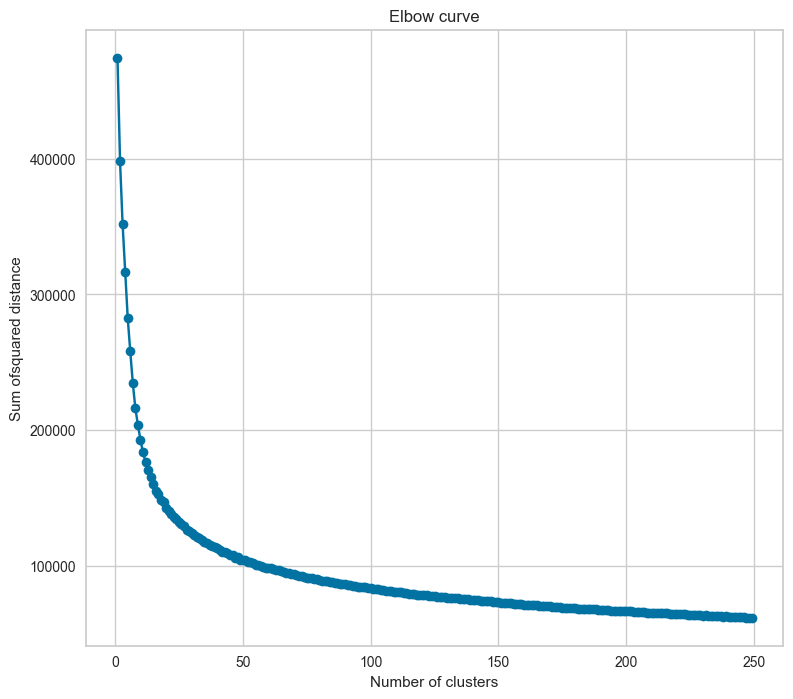

In [386]:
fig = plt.figure(figsize=(9, 8))
plt.plot(range(1, 250), distorsions, marker='o')
plt.title('Elbow curve')
plt.ylabel('Sum ofsquared distance')
plt.xlabel('Number of clusters')

No clear elbow point. Lets use the Silhouette method instead to determine the ideal number of clusters.

In [393]:
from sklearn.metrics import davies_bouldin_score

db_scores = []
for k in tqdm(range(2, 50)):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    labels = kmeans.labels_
    db_score = davies_bouldin_score(features, labels)
    db_scores.append(db_score)

100%|██████████| 48/48 [01:50<00:00,  2.30s/it]


In [394]:
db_scores

[1.7861302763705496,
 1.64510758201167,
 1.677154824392533,
 1.3798813095392937,
 1.3182413227731204,
 1.2610332067875178,
 1.24843733305595,
 1.2915844817777642,
 1.3201893787813623,
 1.3247657550752143,
 1.3689703134064117,
 1.31606895318208,
 1.3784811194467488,
 1.3951123944200179,
 1.3809607108615716,
 1.4271895145973534,
 1.4605296102691072,
 1.515799619735767,
 1.4756275594049135,
 1.4753257768406156,
 1.4824058699648481,
 1.53477789997012,
 1.5564352348164732,
 1.5274705261705237,
 1.545067263851305,
 1.5701922077102228,
 1.5688125997787385,
 1.5647457477225932,
 1.5592931363720224,
 1.5685747606539824,
 1.6060168632691023,
 1.595850712232092,
 1.5545233606438937,
 1.5675860220847693,
 1.5716907555023114,
 1.5717059403964082,
 1.6073747693605835,
 1.6193867210450124,
 1.5800643043340727,
 1.6084914454493915,
 1.6208714237153565,
 1.59590080401476,
 1.5878799865352422,
 1.5944158712078043,
 1.6455453207801636,
 1.6012526140246728,
 1.617737065118158,
 1.641773773017767]

In [398]:
import plotly.express as px

In [404]:
#plt.plot(range(2,50), db_scores, marker='o')
fig = px.line(x=range(2,50), y=db_scores, title='Davies-Bouldin Index')
fig.show()

The index is minimized at k=8.

In [411]:
kmeans = KMeans(n_clusters=8).fit(features)

In [412]:
user_ids_cluster

,user
0,2
1,4
2,5
3,7
4,8
...,...
33896,2102054
33897,2102356
33898,2102680
33899,2102983


In [413]:
cluster_labels = [None] * len(user_ids_cluster)

In [414]:
cluster_labels = kmeans.labels_
cluster_labels.shape

(33901,)

In [415]:
def combine_cluster_labels(user_ids, labels):
    labels_df = pd.DataFrame(labels)
    cluster_df = pd.merge(user_ids, labels_df, left_index=True, right_index=True)
    cluster_df.columns = ['user', 'cluster']
    return cluster_df

In [422]:
clusters_df = combine_cluster_labels(user_ids_cluster, cluster_labels)
clusters_df

,user,cluster
0,2,3
1,4,3
2,5,3
3,7,1
4,8,1
...,...,...
33896,2102054,6
33897,2102356,1
33898,2102680,6
33899,2102983,1


Is it worth using PCA to reduce the dimensions of the features?

In [417]:
accVarRatio = []

for n_components in range(1, 15):
    pca = PCA(n_components=n_components)
    pca.fit(features)

    #print(pca.explained_variance_ratio_.sum())
    #print(pca.singular_values_)

    accVarRatio.append(pca.explained_variance_ratio_.sum())

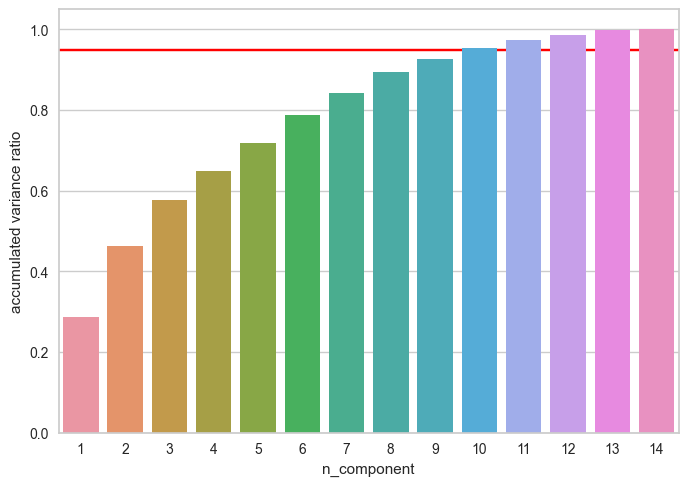

In [419]:
plot_df = pd.DataFrame({'n_component': range(1, 15), 'accumulated variance ratio': accVarRatio})
sns.barplot(x='n_component', y='accumulated variance ratio', data=plot_df)
plt.axhline(y=0.95, color='red', linestyle='-', zorder=0)

Variance is spread out. It is not much worth it to use dimensionality reduction on the dataset.

### Make course recommendations

In [425]:
test_users_clusters = pd.merge(test_users.iloc[:,:2], clusters_df, left_on='user', right_on='user')
test_users_clusters

,user,item,cluster
0,1499703,CO0101EN,1
1,1755211,DS0101EN,6
2,397404,CB0103EN,2
3,1048679,PY0101EN,2
4,1666641,CC0103EN,2
...,...,...,...
995,522355,BD0135EN,7
996,902668,BD0101EN,1
997,1068059,DV0151EN,3
998,1148155,CO0101EN,0


In [446]:
def make_recommendations_cluster(test_users_clusters=test_users_clusters, user):
    cluster_number = test_users_clusters[test_users_clusters['user']==user]['cluster'].to_numpy()[0]
    return test_users_clusters[test_users_clusters['cluster']==cluster_number]['item'].unique()

In [448]:
make_recommendations_cluster(test_users_clusters=test_users_clusters, user=1755211)

array(['DS0101EN', 'PA0101EN', 'BD0211EN', 'ML0101ENv3', 'BD0115EN',
       'DB0101EN', 'BD0101EN', 'DA0101EN', 'DV0101EN', 'DS0103EN',
       'ML0120EN', 'PY0101EN', 'DV0151EN', 'ML0115EN', 'TA0105',
       'DX0108EN', 'WA0101EN', 'RP0101EN', 'ST0101EN', 'IT0101EN',
       'ML0151EN', 'BD0221EN', 'ML0103EN', 'CC0101EN', 'BC0101EN',
       'TA0105EN', 'SC0101EN', 'ML0120ENv2', 'SC0105EN', 'BD0111EN',
       'ML0122ENv1', 'DS0301EN', 'DS0201EN', 'BD0123EN', 'BC0201EN',
       'DS0105EN', 'BD0145EN', 'BD0212EN', 'ML0109EN', 'CL0101EN',
       'BD0141EN', 'CC0103EN', 'DS0321EN', 'AI0111EN', 'DAI101EN',
       'CB0105ENv1', 'DB0151EN', 'CO0301EN', 'RP0103EN', 'DW0101EN',
       'RP0103', 'BD0153EN'], dtype=object)

In [455]:
recommendations_dict_cluster = {}

for user in test_users_clusters['user']:
    recommendations_dict_cluster[user] = [make_recommendations_cluster(test_users_clusters=test_users_clusters, user=user)]

In [474]:
recommendations_df_cluster = pd.DataFrame(recommendations_dict_cluster)
recommendations_df_cluster = recommendations_df_cluster.T
recommendations_df_cluster

,0
1499703,"[CO0101EN, CC0101EN, BD0101EN, BC0101EN, ML012..."
1755211,"[DS0101EN, PA0101EN, BD0211EN, ML0101ENv3, BD0..."
397404,"[CB0103EN, PY0101EN, CC0103EN, DS0103EN, RP010..."
1048679,"[CB0103EN, PY0101EN, CC0103EN, DS0103EN, RP010..."
1666641,"[CB0103EN, PY0101EN, CC0103EN, DS0103EN, RP010..."
...,...
522355,"[BD0111EN, RP0101EN, BD0115EN, DB0101EN, BD021..."
902668,"[CO0101EN, CC0101EN, BD0101EN, BC0101EN, ML012..."
1068059,"[BD0221EN, DS0103EN, CC0103EN, RP0105EN, DV015..."
1148155,"[CO0401EN, RP0101EN, CO0101EN, DS0321EN, CC015..."


In [475]:
from sklearn.preprocessing import MultiLabelBinarizer

In [476]:
mlb = MultiLabelBinarizer(sparse_output=True)

recommendations_df_encoded = recommendations_df_cluster.join(
                pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(recommendations_df_cluster.pop(0)),
                index=recommendations_df_cluster.index,
                columns=mlb.classes_))

recommendations_df_encoded

,AI0111EN,BC0101EN,BC0201EN,BC0202EN,BD0101EN,BD0111EN,BD0115EN,BD0121EN,BD0123EN,BD0131EN,...,SC0103EN,SC0105EN,SECM03EN,ST0101EN,SW0201EN,TA0105,TA0105EN,TA0106EN,TMP0105EN,WA0101EN
1499703,0,1,1,0,1,1,1,1,0,0,...,0,0,0,1,0,1,1,0,0,1
1755211,1,1,1,0,1,1,1,0,1,0,...,0,1,0,1,0,1,1,0,0,1
397404,1,1,1,1,1,1,0,0,1,1,...,1,0,0,1,0,0,0,1,0,1
1048679,1,1,1,1,1,1,0,0,1,1,...,1,0,0,1,0,0,0,1,0,1
1666641,1,1,1,1,1,1,0,0,1,1,...,1,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522355,0,1,1,0,1,1,1,1,1,1,...,1,0,0,1,0,0,0,0,1,0
902668,0,1,1,0,1,1,1,1,0,0,...,0,0,0,1,0,1,1,0,0,1
1068059,1,1,0,0,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1
1148155,0,1,1,1,1,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1


Lets see the most recommended courses.

In [486]:
top_recommendations_cluster = recommendations_df_encoded.sum()

In [491]:
pd.DataFrame(top_recommendations_cluster.sort_values(ascending=False)[:10], columns=['Number of Recommendations'])

,Number of Recommendations
DS0101EN,983
BD0211EN,983
DS0105EN,983
PY0101EN,983
DB0101EN,948
ML0101ENv3,948
BC0101EN,948
DS0103EN,948
RP0101EN,948
BD0101EN,948
